<a href="https://colab.research.google.com/github/Rumaisa1054/Data_Science/blob/main/time_series/time_series_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pre-processing**
1. Sort the values
2. Handle missing values
3. plot the series to know seasonality, trend, cyclic patterns etc
4. Check stationarity using ADF - augmented dickey fullers test
5. KPSS test - tells stationarity of trend only : **Kwiatkowski–Phillips–Schmidt–Shin Test**
6. **Phillips perron test:** PP test
7. **De-seasonalizing the time series data:** All year temp - summer temp more and winter temp low but In this we donot care about the seasons - focus on the data as a whole
8. **Checking Autocorrelation :** How much a time series is related to its own past values.
9. **LAg checking**
10. Smoothen the data and then apply model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url)
df.head()


,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [20]:
df = df.sort_values(by=["Month"])
# Year = 4 digits → %Y
# Month = 2 digits → %m
# format="%y-%m"   # %y = two-digit year → 49, not 1949
df["Month"]  = pd.to_datetime(df["Month"],format = "%Y-%m")
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [21]:
df["Month"] = pd.to_datetime(df["Month"], format="%Y-%m")
df.set_index("Month", inplace=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [22]:
"""
df["year"] = df["Month"].dt.year
df["month"] = df["Month"].dt.month
df = df.drop(columns=["Month"],axis = 1)
"""

'\ndf["year"] = df["Month"].dt.year\ndf["month"] = df["Month"].dt.month\ndf = df.drop(columns=["Month"],axis = 1)\n'

In [25]:
# to renaem columns
df.columns = ["No of passengers"] # you can rename all columns other than index column liek this
df.head()

,No of passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


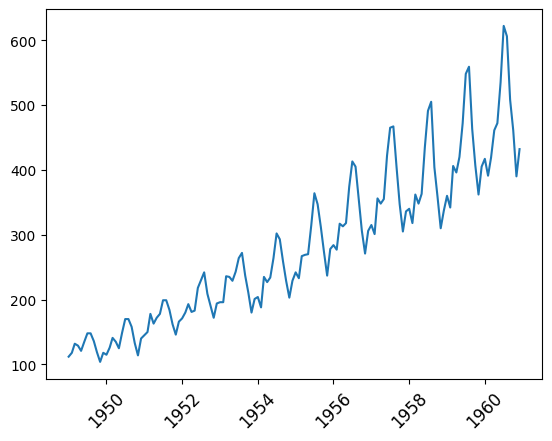

In [30]:
plt.plot(df.index,df["No of passengers"])
plt.xticks(rotation=45,fontsize = 12)   # rotate x-axis labels
plt.show()

In [43]:
import plotly.express as px
fig = px.line(df["No of passengers"])
fig.update_traces(line_color='red')
fig.show()

In [ ]:
'''
import plotly.express as px
fig = px.line(
    df,y="No of passengers",
    title="Passengers for 1949",
)
fig.update_xaxes(range=[pd.to_datetime("1951-01-01"),
                        pd.to_datetime("1952-12-01")])

fig.show()
'''